# Blotto 12 Soldiers

In [1]:
from games.blotto import Blotto
import numpy as np
import matplotlib.pyplot as plt
from agents.random_agent import RandomAgent
from agents.fictitious_play import FictitiousPlay
from agents.regret_matching import RegretMatching
from utilities.utils import run_and_plot, plot_convergence_to_nash, plot_action_histogram, plot_action_trace_from_history
from utilities.utils import plot_dual_agent_simplex, compute_empirical_distributions

In [2]:
#initialize game
game = Blotto(12,3)
game.reset()

#print game information
agents = game.agents
moves = game._moves
num_action = game._num_actions
action_spaces = game.action_spaces
observation_spaces = game.observation_spaces 
print("Game Information:")
print("Agents:", agents)
print("Moves:", moves)
print("Number of Actions:", num_action)
print("Action Spaces:", action_spaces)
print("Observation Spaces:", observation_spaces)

Game Information:
Agents: ['agent_0', 'agent_1']
Moves: [[1, 1, 10], [1, 2, 9], [1, 3, 8], [1, 4, 7], [1, 5, 6], [2, 2, 8], [2, 3, 7], [2, 4, 6], [2, 5, 5], [3, 3, 6], [3, 4, 5], [4, 4, 4]]
Number of Actions: 12
Action Spaces: {'agent_0': Discrete(12), 'agent_1': Discrete(12)}
Observation Spaces: {'agent_0': typing.Dict[~AgentID, ~ActionType], 'agent_1': typing.Dict[~AgentID, ~ActionType]}


# Fictitious Play vs Fictitious Play

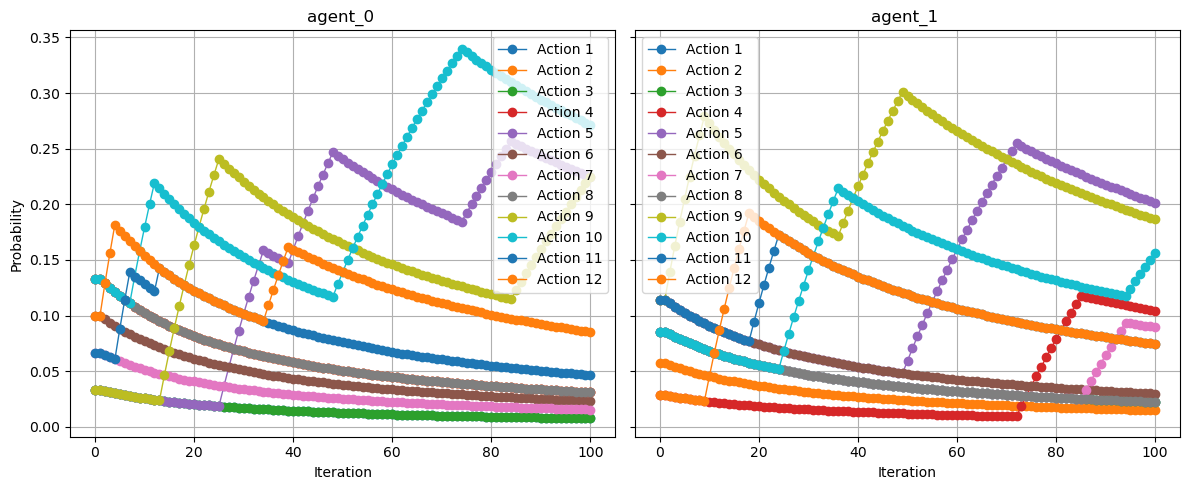

In [3]:
fp_agents = {agent: FictitiousPlay(game, agent) for agent in agents}
policies, action_history = run_and_plot(fp_agents, game, num_iterations=100, title_suffix="")

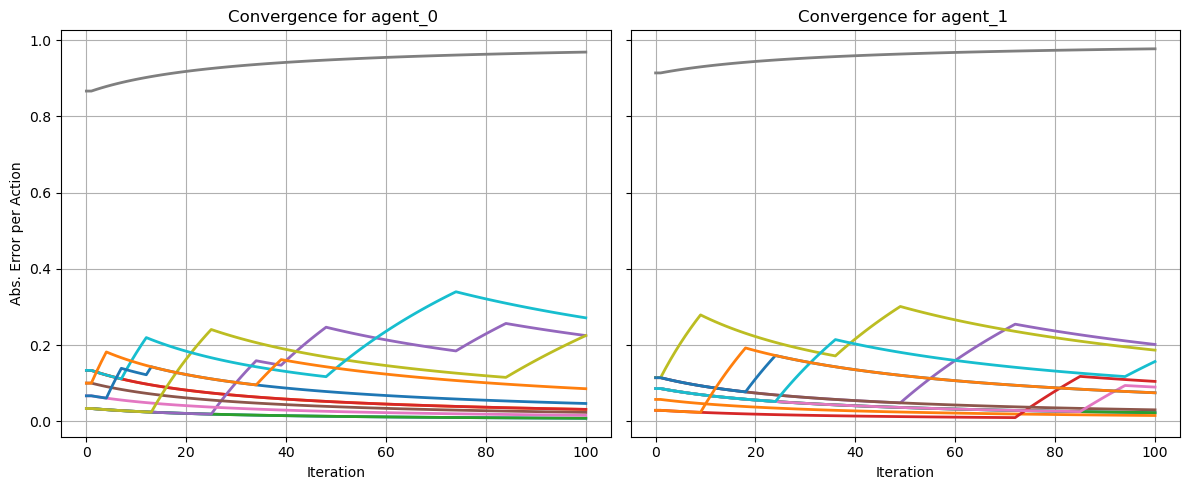

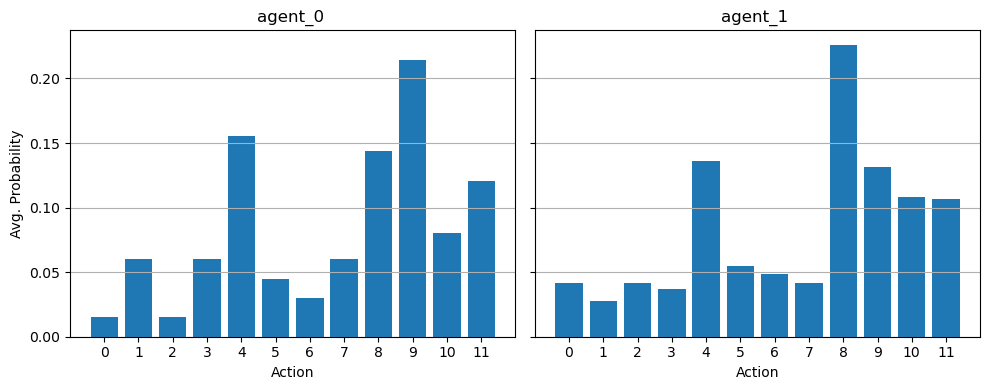

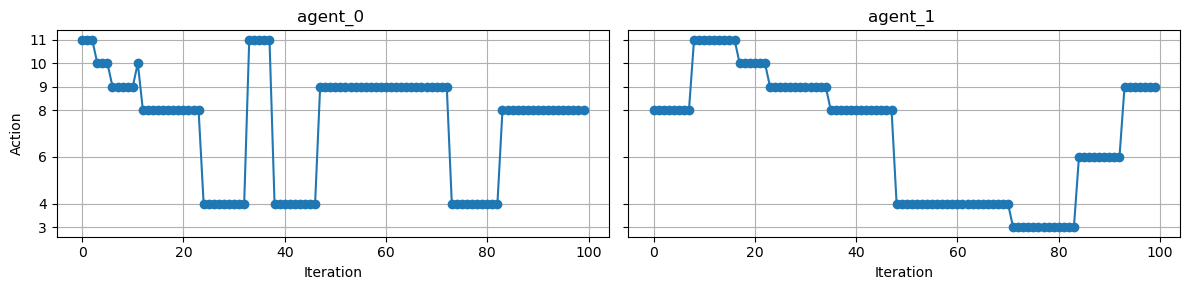

In [4]:

nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [5]:
for agent in fp_agents:
    print(agent, fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in fp_agents:
    action = get_action_from_policy(fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00775194 0.03100775 0.00775194 0.03100775 0.2248062  0.02325581
 0.01550388 0.03100775 0.2248062  0.27131783 0.04651163 0.08527132]
agent_1 [0.02238806 0.01492537 0.02238806 0.10447761 0.20149254 0.02985075
 0.08955224 0.02238806 0.18656716 0.15671642 0.07462687 0.07462687]
Action with high probability for agent_0: [3, 3, 6]
Action with high probability for agent_1: [1, 5, 6]


# Regret Matching vs Regret Matching

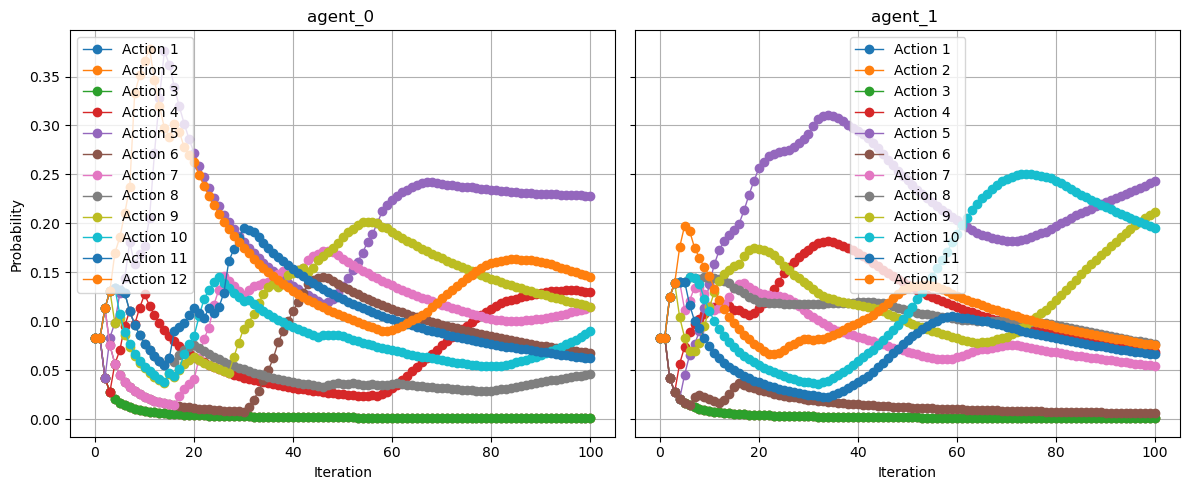

In [6]:
rm_agents = {agent: RegretMatching(game, agent) for agent in agents}
policies, action_history = run_and_plot(rm_agents, game, num_iterations=100, title_suffix="")

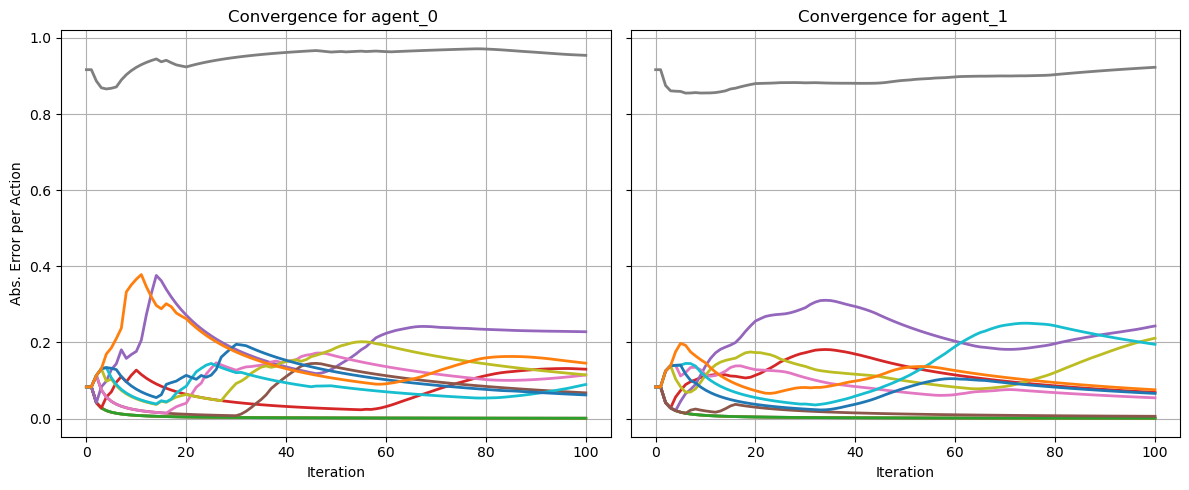

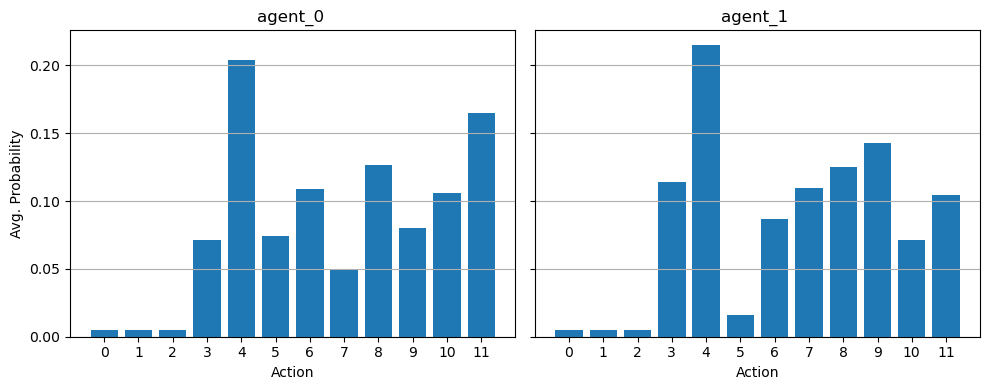

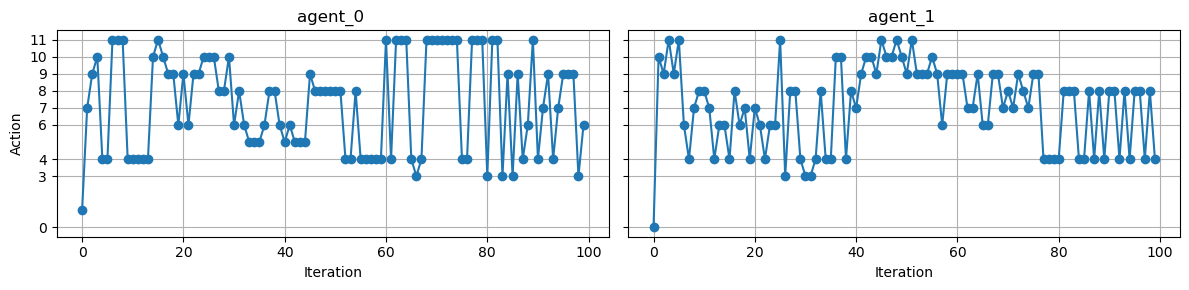

In [7]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [8]:
for agent in rm_agents:
    print(agent, rm_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_agents:
    action = get_action_from_policy(rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00083333 0.00083333 0.00083333 0.12968483 0.22809421 0.06759957
 0.1143373  0.04576601 0.1149044  0.08953429 0.06201259 0.14556681]
agent_1 [0.00083333 0.00083333 0.00083333 0.06872119 0.2432662  0.00597636
 0.05450213 0.07702498 0.21128904 0.19500443 0.06605589 0.07565977]
Action with high probability for agent_0: [1, 5, 6]
Action with high probability for agent_1: [1, 5, 6]


# Fictitious Play vs Regret Matching

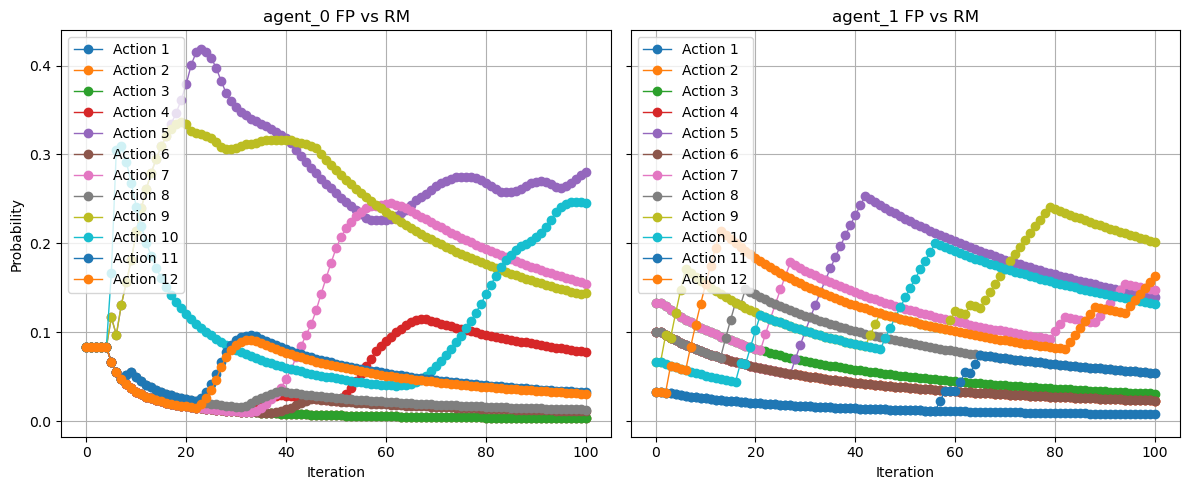

In [9]:
rm_vs_fp_agents = {agents[0]: RegretMatching(game=game, agent=agents[0]),
              agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(rm_vs_fp_agents, game, num_iterations=100, title_suffix="FP vs RM")

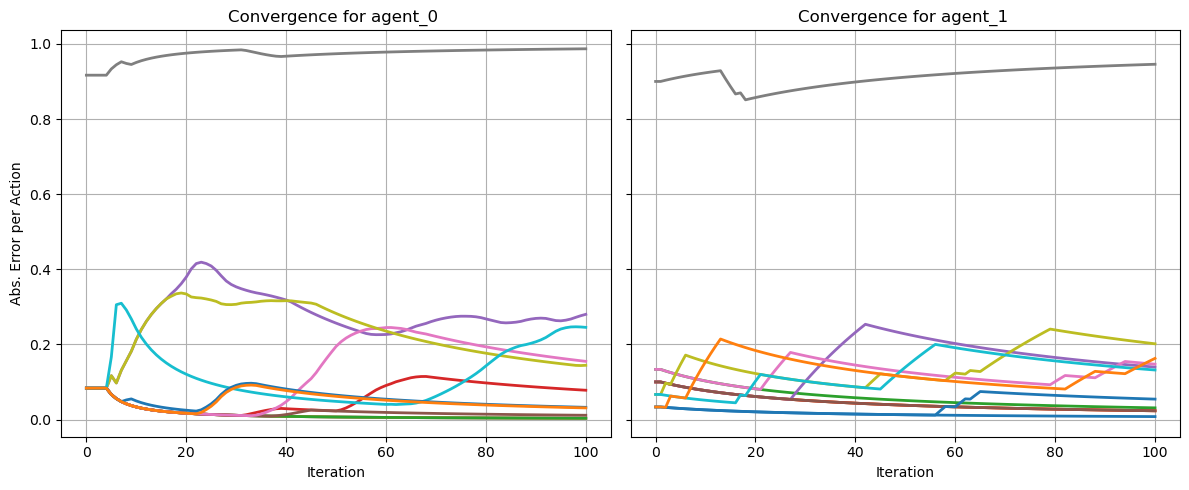

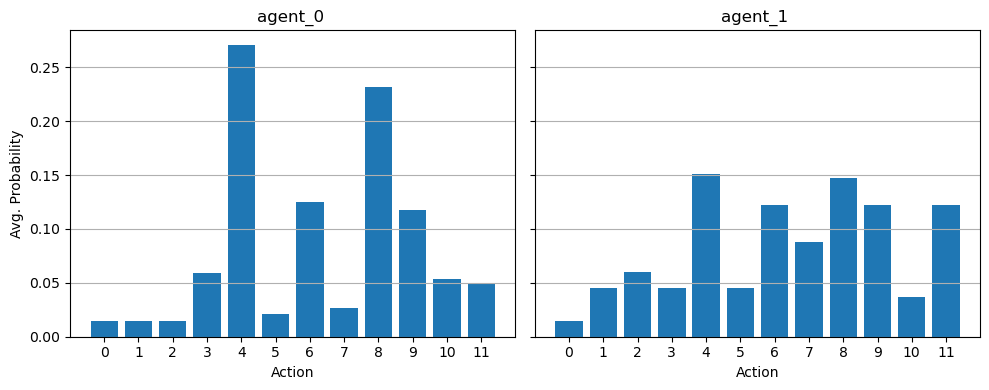

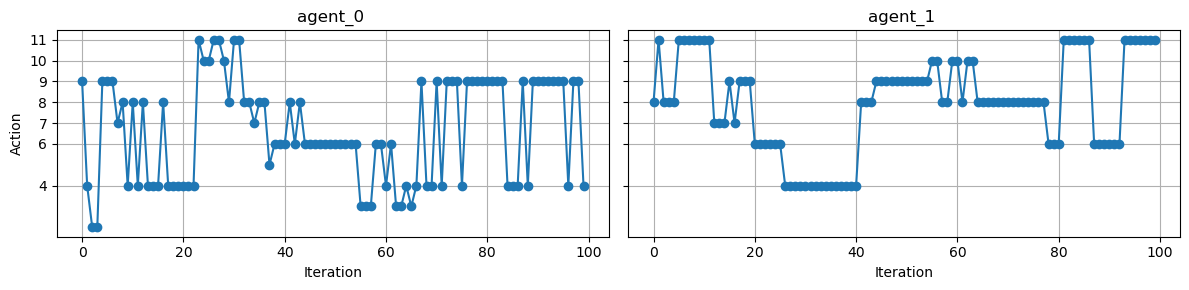

In [10]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [11]:
for agent in rm_vs_fp_agents:
    print(agent, rm_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_vs_fp_agents:
    action = get_action_from_policy(rm_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00333333 0.00333333 0.00333333 0.07790339 0.27999817 0.01129167
 0.15480126 0.01310035 0.14433156 0.24531044 0.03243286 0.0308303 ]
agent_1 [0.00775194 0.02325581 0.03100775 0.02325581 0.13953488 0.02325581
 0.14728682 0.05426357 0.20155039 0.13178295 0.05426357 0.1627907 ]
Action with high probability for agent_0: [1, 5, 6]
Action with high probability for agent_1: [2, 5, 5]


# Random Agent vs Random Agent

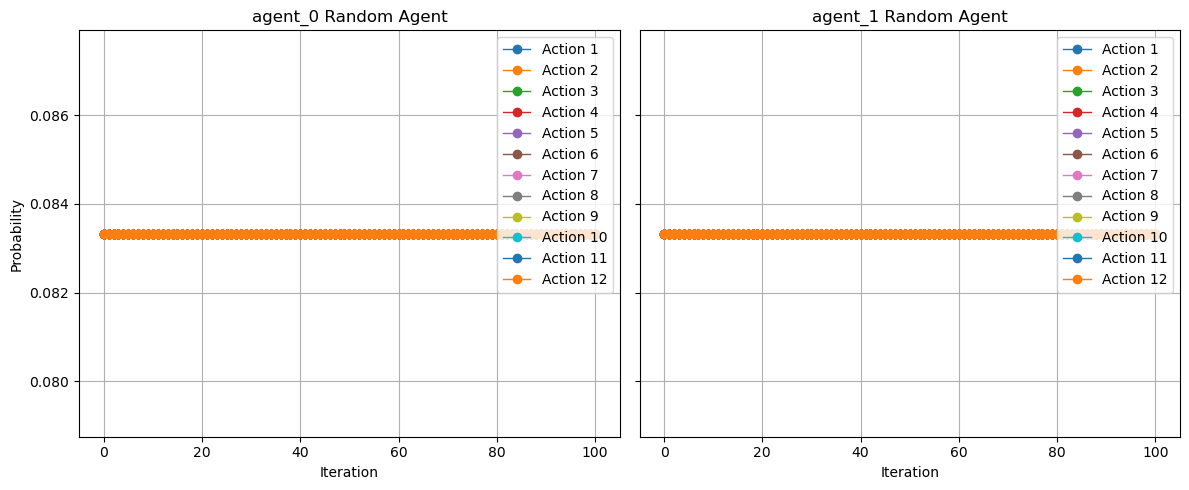

In [12]:
random_agents = {agent: RandomAgent(game, agent) for agent in agents}
policies, action_history = run_and_plot(random_agents, game, num_iterations=100, title_suffix="Random Agent")

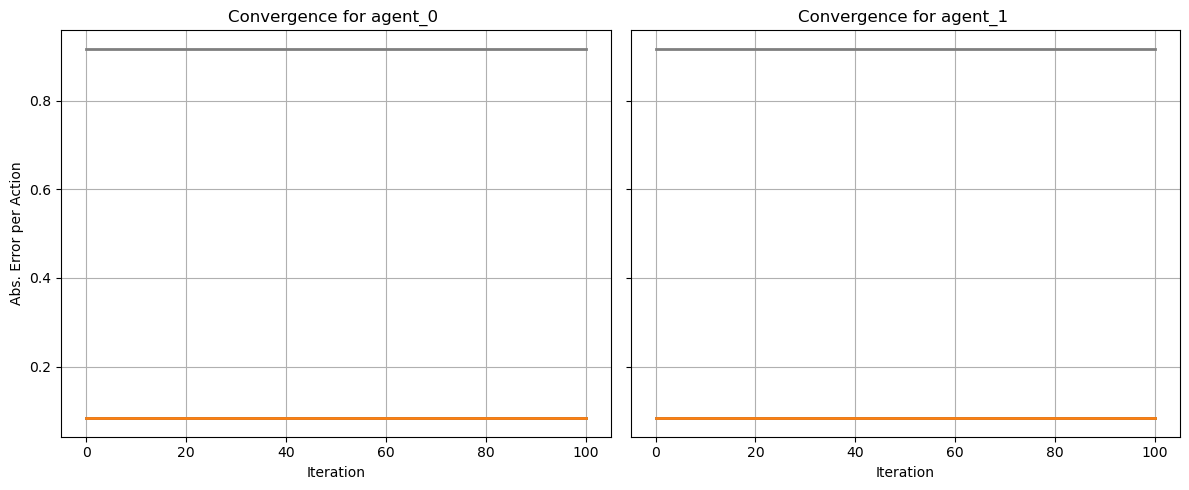

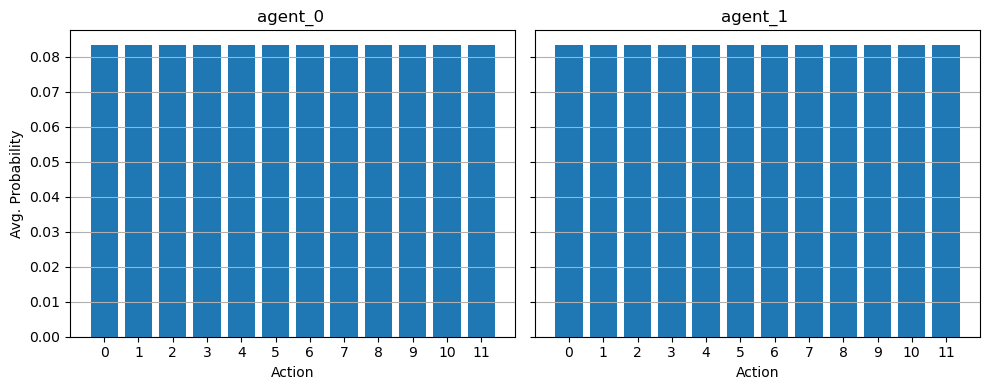

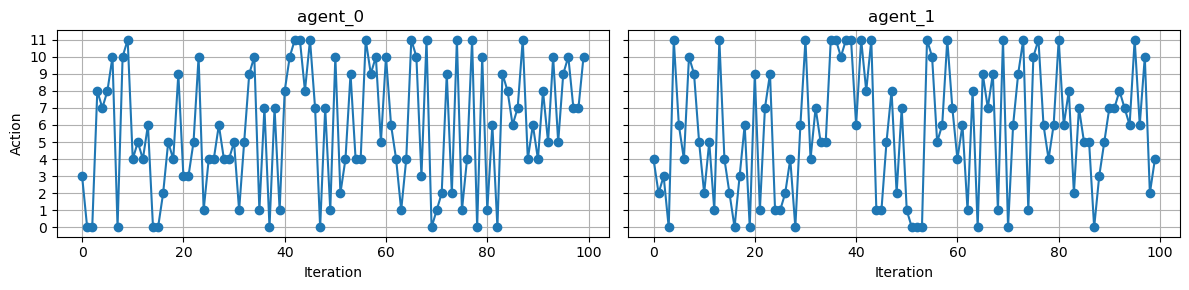

In [13]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Fictitious Play

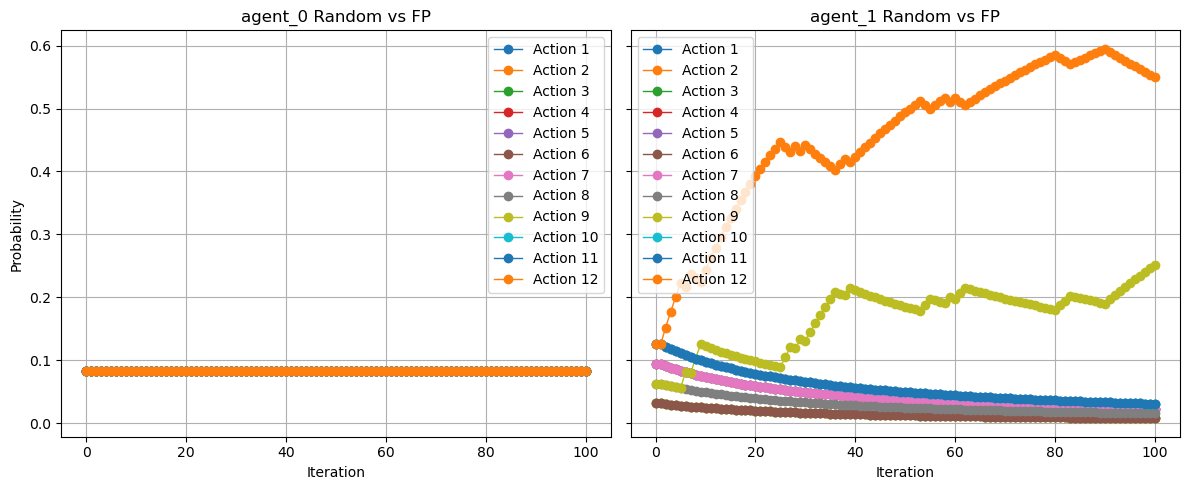

In [14]:
random_vs_fp_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                          agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_fp_agents, game, num_iterations=100, title_suffix="Random vs FP")

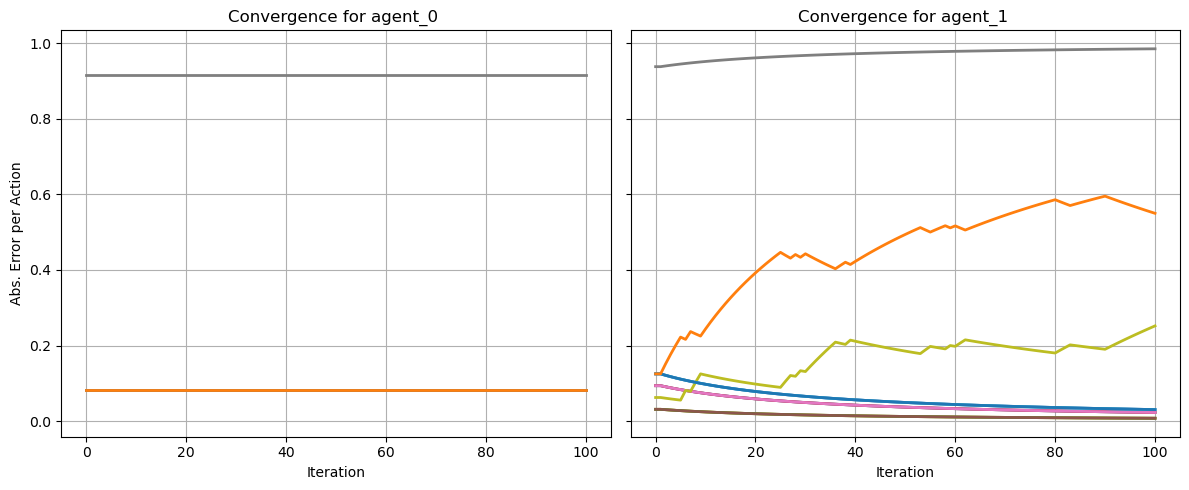

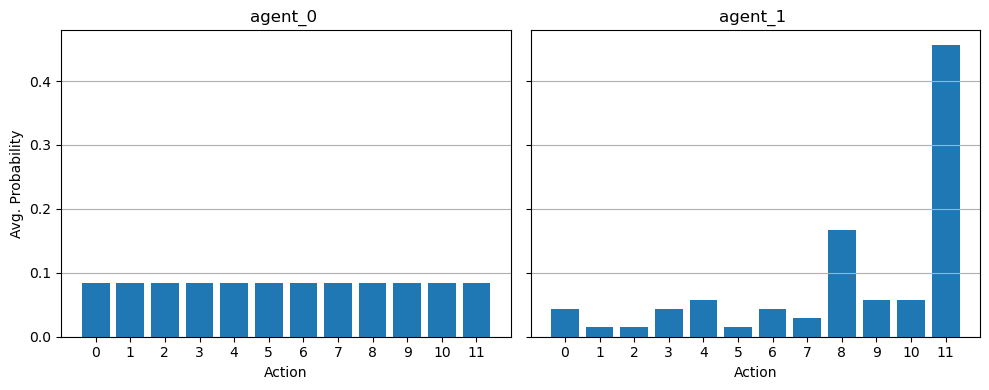

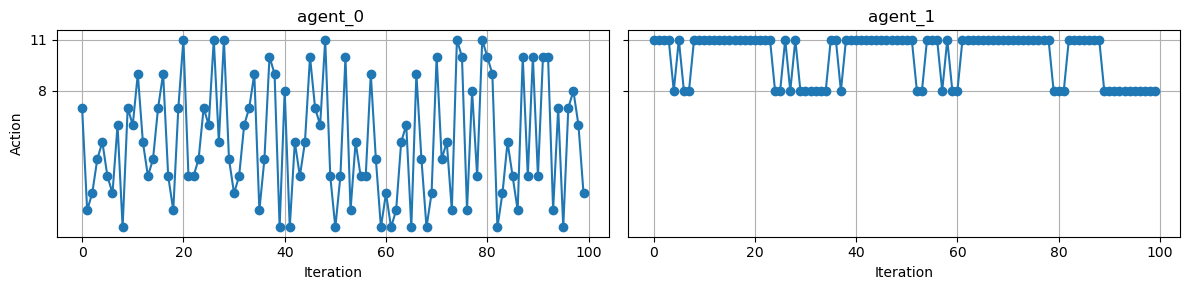

In [15]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [16]:
for agent in random_vs_fp_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_fp_agents:
    action = get_action_from_policy(random_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
agent_1 [0.02290076 0.00763359 0.00763359 0.02290076 0.03053435 0.00763359
 0.02290076 0.01526718 0.2519084  0.03053435 0.03053435 0.54961832]
Action with high probability for agent_0: [1, 1, 10]
Action with high probability for agent_1: [4, 4, 4]


# Random Agent vs Regret Matching


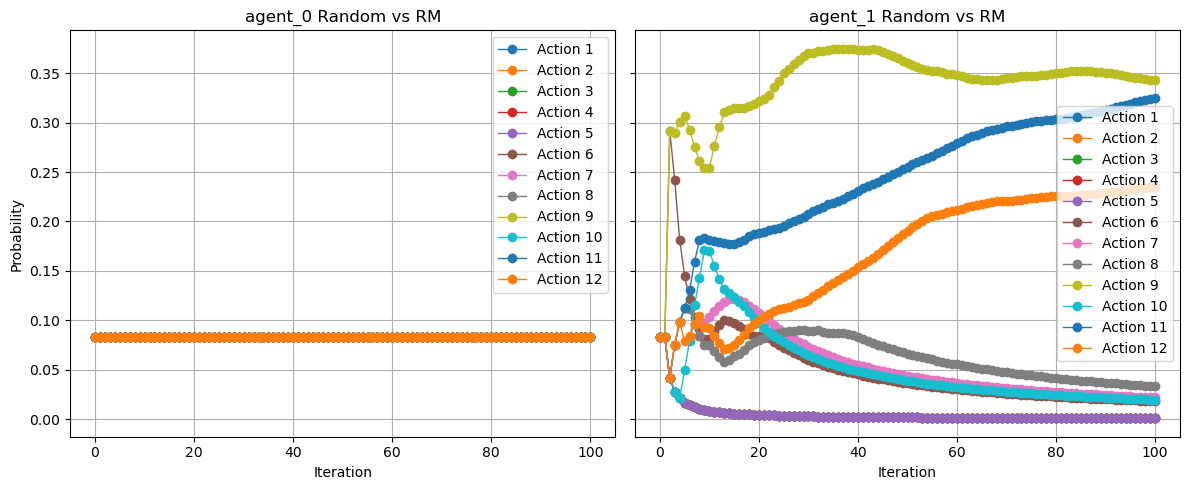

In [17]:
random_vs_rm_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                            agents[1]: RegretMatching(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_rm_agents, game, num_iterations=100, title_suffix="Random vs RM")

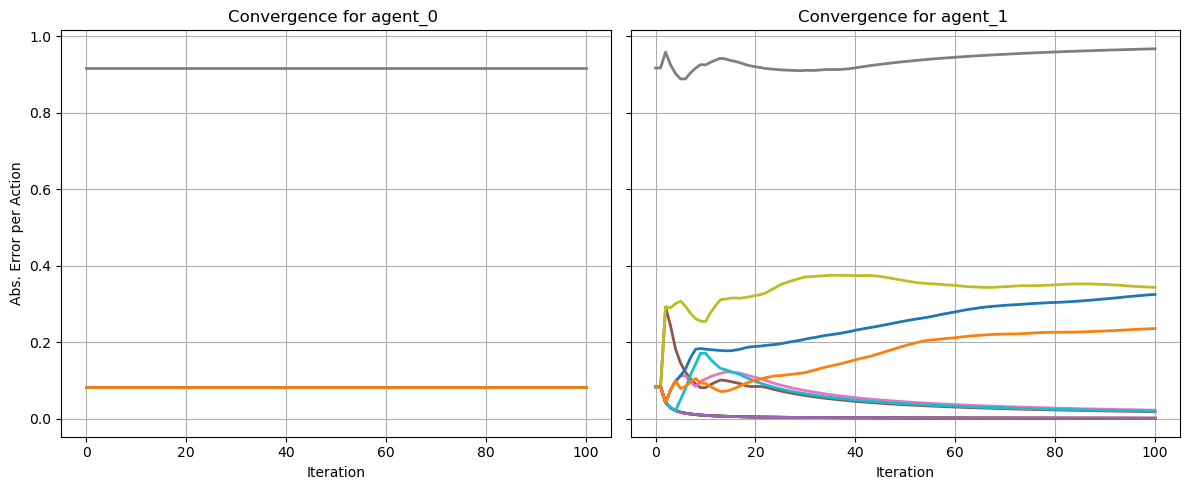

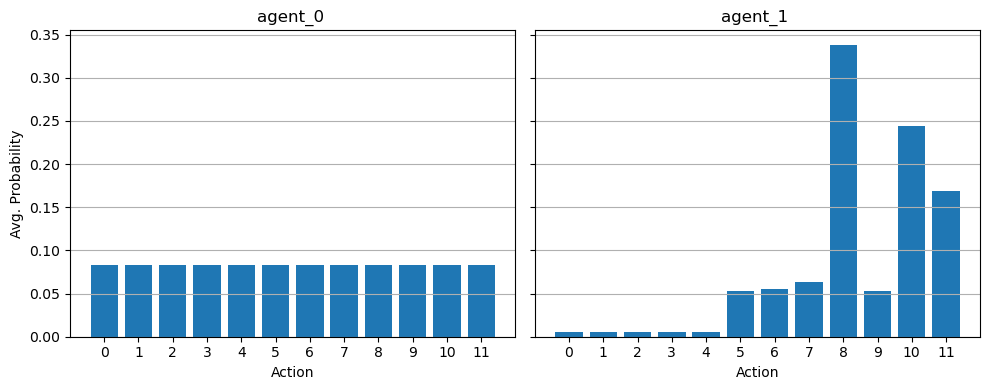

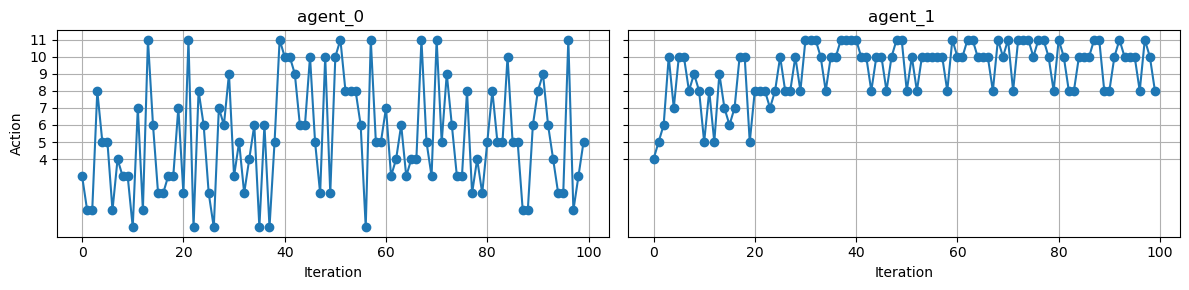

In [18]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [19]:
for agent in random_vs_rm_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_rm_agents:
    action = get_action_from_policy(random_vs_rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
agent_1 [0.02290076 0.00763359 0.00763359 0.02290076 0.03053435 0.00763359
 0.02290076 0.01526718 0.2519084  0.03053435 0.03053435 0.54961832]
Action with high probability for agent_0: [1, 1, 10]
Action with high probability for agent_1: [2, 5, 5]
